In [3]:
ls;

README.md                   landsend_veg_2007_2012.csv  parks.py                    preprocess.ipynb


In [8]:
import pandas as pd;
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
df = pd.read_csv("landsend_veg_2007_2012.csv")

In [159]:
species = df[["Species"]].copy();
species["counts"] = 1;
species_freq = species.groupby("Species").agg(sum).iloc[:,0].copy();

In [160]:
species_freq.sort(ascending=False)

In [161]:
valid = df[["Site-YearCode", "Species"]].applymap(lambda x: x == "-")


In [51]:
x = "NMS-2010"

In [162]:
df_yr_sp = df [["Site-YearCode", "Species"]]
valid = ~df_yr_sp.applymap(lambda x: x == "-").any(axis=1)
df_yr_sp = df_yr_sp.loc[valid]


In [163]:
get_year = lambda x: int(x.split("-")[-1])


In [165]:
df_yr_sp["year"] = df_yr_sp["Site-YearCode"].map(get_year)


In [167]:
get_site = lambda x: int(x.split("-")[0])

In [170]:
df_yr_sp["Site-YearCode"][1:2]

3    NMS-2010
Name: Site-YearCode, dtype: object

In [171]:
get_site = lambda x: (x.split("-")[0])

In [172]:
str(df_yr_sp["Site-YearCode"][1:2]).split("-")[0]

'3    NMS'

In [173]:
df_yr_sp["site"] = df_yr_sp["Site-YearCode"].map(get_site)

In [174]:
df_yr_sp.head()

,Site-YearCode,Species,year,site
2,NMS-2010,Achillea millefolium,2010,NMS
3,NMS-2010,Achillea millefolium,2010,NMS
4,NMS-2010,Achillea millefolium,2010,NMS
5,NMS-2010,Achillea millefolium,2010,NMS
6,NMS-2011,Achillea millefolium,2011,NMS


In [175]:
for kk, vv in df_yr_sp.groupby(["site", "year"]):
    print(kk)
    print (vv["Species"].unique().shape[0])

('EAPO', 2011)
31
('NMS', 2010)
45
('NMS', 2011)
35
('NMS', 2012)
54
('NUWO', 2010)
54
('NUWO', 2011)
25
('NUWO', 2012)
47
('SUDU', 2008)
33
('SUDU', 2009)
40
('SUDU', 2010)
35
('SUDU', 2011)
31
('SUDU', 2012)
41
('SUDU', 2013)
4


In [176]:
df_yr_sp.groupby(["site", "year"]).agg("count")

Site-YearCode  Species
site year                        
EAPO 2011            390      390
NMS  2010            247      247
     2011            175      175
     2012            335      335
NUWO 2010            320      320
     2011            115      115
     2012            400      400
SUDU 2008            498      498
     2009            505      505
     2010            222      222
     2011            177      177
     2012            200      200
     2013              5        5

AttributeError: 'Series' object has no attribute 'find'

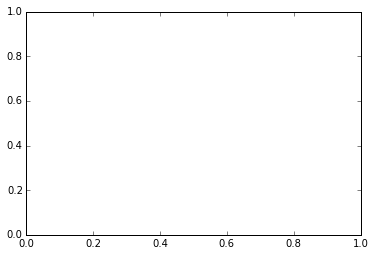

In [177]:
for site in df_yr_sp['site'].unique():
    df_site = df_yr_sp[df_yr_sp['site'] == site]
    plt.plot(df_site['year'], df_site['Site-YearCode'])

In [178]:
df_yr_sp[df_yr_sp['site'] == 'SUDO']

,Site-YearCode,Species,year,site


In [181]:
spnum = df_yr_sp.groupby(["site", "year"]).agg("count")
spnum.head()

Site-YearCode  Species  New_Count
site year                                   
EAPO 2011            390      390          0
NMS  2010            247      247          0
     2011            175      175          0
     2012            335      335          0
NUWO 2010            320      320          0

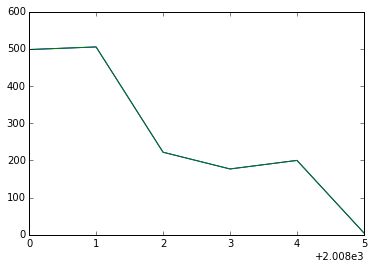

In [200]:
tt = spnum.loc["SUDU"].reset_index()["year"]
yy = spnum.loc["SUDU"]
sudu = plt.plot(tt, yy)


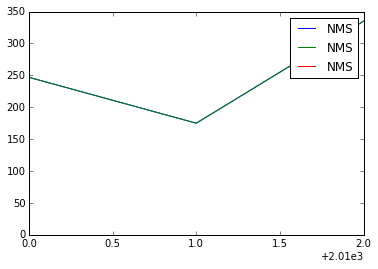

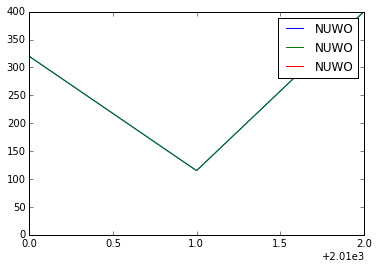

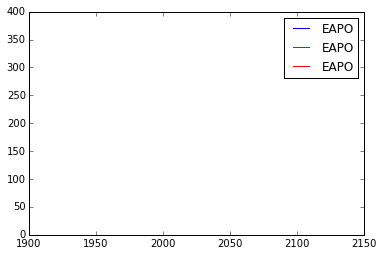

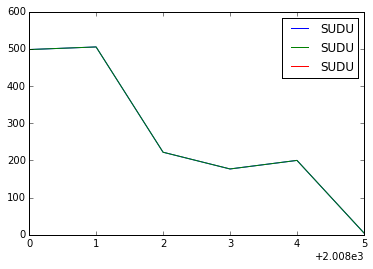

In [202]:
for site in df_yr_sp['site'].unique():
    plt.figure()
    tt = spnum.loc[site].reset_index()["year"]
    yy = spnum.loc[site]
    plt.plot(tt, yy, label=site)    
    plt.legend()